In [1]:
import pandas as pd

df = pd.read_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\raw_data\customer_segmentation_data.csv")

In [3]:
#check for nulls
df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [7]:
#remove pace and rename it lower case
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [12]:
df.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'education_level',
       'geographic_information', 'occupation', 'income_level',
       'behavioral_data', 'purchase_history',
       'interactions_with_customer_service', 'insurance_products_owned',
       'coverage_amount', 'premium_amount', 'policy_type',
       'customer_preferences', 'preferred_communication_channel',
       'preferred_contact_time', 'preferred_language', 'segmentation_group'],
      dtype='object')

In [14]:
#clean data
#drop unnecssary columns
df = df.drop(columns=['customer_id'])

In [16]:
df.columns

Index(['age', 'gender', 'marital_status', 'education_level',
       'geographic_information', 'occupation', 'income_level',
       'behavioral_data', 'purchase_history',
       'interactions_with_customer_service', 'insurance_products_owned',
       'coverage_amount', 'premium_amount', 'policy_type',
       'customer_preferences', 'preferred_communication_channel',
       'preferred_contact_time', 'preferred_language', 'segmentation_group'],
      dtype='object')

In [23]:
df['preferred_contact_time'].head()

0    Afternoon
1      Morning
2      Evening
3      Anytime
4     Weekends
Name: preferred_contact_time, dtype: object

In [20]:
df['purchase_history'].value_counts()

purchase_history
03-12-2018    173
1/17/2022      90
10/16/2019     89
9/21/2018      87
1/13/2022      86
             ... 
6/16/2020       2
03-03-2021      1
8/19/2021       1
04-04-2020      1
02-12-2021      1
Name: count, Length: 2016, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   age                                 53503 non-null  int64 
 1   gender                              53503 non-null  object
 2   marital_status                      53503 non-null  object
 3   education_level                     53503 non-null  object
 4   geographic_information              53503 non-null  object
 5   occupation                          53503 non-null  object
 6   income_level                        53503 non-null  int64 
 7   behavioral_data                     53503 non-null  object
 8   purchase_history                    53503 non-null  object
 9   interactions_with_customer_service  53503 non-null  object
 10  insurance_products_owned            53503 non-null  object
 11  coverage_amount                     53503 non-null  in

In [30]:
df['income_level'].describe()

count     53503.000000
mean      82768.324318
std       36651.075670
min       20001.000000
25%       51568.500000
50%       80719.000000
75%      115973.500000
max      149999.000000
Name: income_level, dtype: float64

In [44]:
#check for outliers befor applying scalar
Q1 = df['income_level'].quantile(0.25)
Q3 = df['income_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"IQR: {IQR}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

outliers = df[(df['income_level'] < lower_bound) | (df['income_level'] > upper_bound)]
print(f"number of outliers: {outliers.shape[0]}")

IQR: 64405.0
lower_bound: -45039.0
upper_bound: 212581.0
number of outliers: 0


In [54]:
#check for all numeric columns at once

num_cols = df.select_dtypes(include=['int64']).columns
outlier_summary = {}

for col in num_cols:
    print(f"{col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"q1:{q1}")
    print(f"q3:{q3}")
    print(f"iqr:{iqr}")
    print(f"lower_bound:{lower_bound}")
    print(f"upper_bound:{upper_bound}")
    outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    outlier_summary[col] = {
        "IQR":iqr,
        "lower_bound":lower_bound,
        "upper_bound":upper_bound,
        "outlier_count": outliers.shape[0]
    }

print(f"{outlier_summary}")

age
q1:32.0
q3:57.0
iqr:25.0
lower_bound:-5.5
upper_bound:94.5
income_level
q1:51568.5
q3:115973.5
iqr:64405.0
lower_bound:-45039.0
upper_bound:212581.0
coverage_amount
q1:249613.5
q3:739124.0
iqr:489510.5
lower_bound:-484652.25
upper_bound:1473389.75
premium_amount
q1:1817.0
q3:4311.5
iqr:2494.5
lower_bound:-1924.75
upper_bound:8053.25
{'age': {'IQR': 25.0, 'lower_bound': -5.5, 'upper_bound': 94.5, 'outlier_count': 0}, 'income_level': {'IQR': 64405.0, 'lower_bound': -45039.0, 'upper_bound': 212581.0, 'outlier_count': 0}, 'coverage_amount': {'IQR': 489510.5, 'lower_bound': -484652.25, 'upper_bound': 1473389.75, 'outlier_count': 0}, 'premium_amount': {'IQR': 2494.5, 'lower_bound': -1924.75, 'upper_bound': 8053.25, 'outlier_count': 0}}


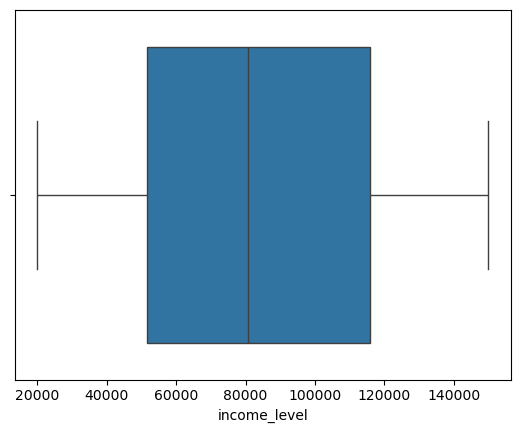

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['income_level'])
plt.show()

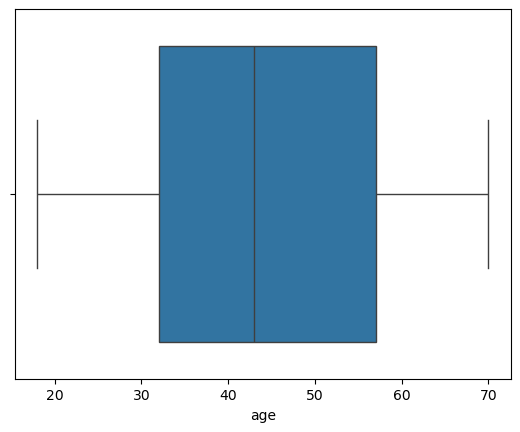

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.show()

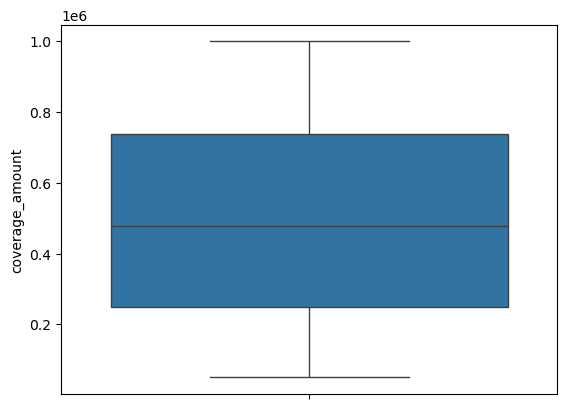

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['coverage_amount'])
plt.show()

In [82]:
#remove - and replace with / purchase history to datetime
df['purchase_history'] = df['purchase_history'].str.replace('-','/', regex = False)
df['purchase_history'].value_counts()

purchase_history
03/12/2018    173
1/17/2022      90
10/16/2019     89
9/21/2018      87
1/13/2022      86
             ... 
6/16/2020       2
03/03/2021      1
8/19/2021       1
04/04/2020      1
02/12/2021      1
Name: count, Length: 2016, dtype: int64

In [86]:
#convert this into datetype
df_clean = df.copy()
df_clean['purchase_history'] = pd.to_datetime(df_clean['purchase_history'])

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   age                                 53503 non-null  int64         
 1   gender                              53503 non-null  object        
 2   marital_status                      53503 non-null  object        
 3   education_level                     53503 non-null  object        
 4   geographic_information              53503 non-null  object        
 5   occupation                          53503 non-null  object        
 6   income_level                        53503 non-null  int64         
 7   behavioral_data                     53503 non-null  object        
 8   purchase_history                    53503 non-null  datetime64[ns]
 9   interactions_with_customer_service  53503 non-null  object        
 10  insurance_products_own

In [90]:
#save cleaned dataset
df_clean.to_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\customer_segmentation_data_cleaned.csv",index = False)

In [106]:
#scaling integer data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scalar = StandardScaler()
scaled_array = scalar.fit_transform(df[['age','income_level','coverage_amount','premium_amount']])

df_scaled = pd.DataFrame(scaled_array,columns=['age_scaled','income_level_scaled','coverage_amount_scaled','premium_amount_scaled'],index=df.index)
# Concatenate with original df
df_final = pd.concat([df, df_scaled], axis=1)

df_final.head(10)

,age,gender,marital_status,education_level,geographic_information,occupation,income_level,behavioral_data,purchase_history,interactions_with_customer_service,...,policy_type,customer_preferences,preferred_communication_channel,preferred_contact_time,preferred_language,segmentation_group,age_scaled,income_level_scaled,coverage_amount_scaled,premium_amount_scaled
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04/10/2018,Phone,...,Group,Email,In-Person Meeting,Afternoon,English,Segment5,-1.401980,-0.333617,-0.469361,-0.213640
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11/06/2018,Chat,...,Group,Mail,In-Person Meeting,Morning,French,Segment5,-1.203033,-0.780348,1.071729,-0.822588
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06/05/2021,Email,...,Group,Email,Mail,Evening,German,Segment3,-1.004085,-0.241996,1.048219,1.080474
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09/02/2018,Chat,...,Family,Text,In-Person Meeting,Anytime,French,Segment3,-1.600928,-0.528975,1.099966,1.025256
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09/10/2018,Chat,...,Family,Email,Text,Weekends,English,Segment2,-1.269349,-1.199821,-0.469722,-1.359210
5,41,Female,Separated,Master's Degree,Uttar Pradesh,Nurse,87188,policy5,9/19/2020,Chat,...,Individual,Text,Text,Afternoon,English,Segment4,-0.208295,0.120589,0.291264,-1.491421
6,55,Male,Single,Bachelor's Degree,Rajasthan,Manager,94891,policy3,07/04/2021,Chat,...,Group,In-Person Meeting,Text,Weekends,Mandarin,Segment5,0.720128,0.330762,0.415376,0.495634
7,35,Male,Married,Master's Degree,Himachal Pradesh,Artist,61003,policy1,11/01/2021,Phone,...,Business,Email,Phone,Morning,English,Segment5,-0.606190,-0.593858,-0.274154,-1.458757
8,43,Female,Single,Doctorate,Manipur,Salesperson,116249,policy1,9/20/2020,Mobile App,...,Business,In-Person Meeting,Text,Weekends,Mandarin,Segment2,-0.075663,0.913506,-0.645141,-0.320186
9,32,Female,Single,Master's Degree,Gujarat,Artist,49083,policy3,4/24/2020,Phone,...,Group,Phone,Email,Weekends,English,Segment2,-0.805137,-0.919090,0.778666,1.222018


In [108]:
df_final = df_final.drop(columns=['age','income_level','coverage_amount','premium_amount'])

In [ ]:
df_final.to_csv()

#load scaled data
import pandas as pd

df = pd.read_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\customer_segmentation_data_cleaned.csv") 
df.head()

In [5]:
df.columns

Index(['age', 'gender', 'marital_status', 'education_level',
       'geographic_information', 'occupation', 'income_level',
       'behavioral_data', 'purchase_history',
       'interactions_with_customer_service', 'insurance_products_owned',
       'coverage_amount', 'premium_amount', 'policy_type',
       'customer_preferences', 'preferred_communication_channel',
       'preferred_contact_time', 'preferred_language', 'segmentation_group'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   age                                 53503 non-null  int64 
 1   gender                              53503 non-null  object
 2   marital_status                      53503 non-null  object
 3   education_level                     53503 non-null  object
 4   geographic_information              53503 non-null  object
 5   occupation                          53503 non-null  object
 6   income_level                        53503 non-null  int64 
 7   behavioral_data                     53503 non-null  object
 8   purchase_history                    53503 non-null  object
 9   interactions_with_customer_service  53503 non-null  object
 10  insurance_products_owned            53503 non-null  object
 11  coverage_amount                     53503 non-null  in

In [19]:
#check for marital status
df['marital_status'].value_counts()
df_check = df.copy()
df_check['marital_status'] = df['marital_status'].str.strip().str.lower()
df_check['marital_status'].value_counts()

marital_status
married      13219
divorced     13151
single        9195
widowed       9077
separated     8861
Name: count, dtype: int64

In [ ]:
#check for geographic_information 
df['geographic_information'].value_counts()
df_check = df.copy()
df_check['geographic_information'] = df['geographic_information'].str.strip().str.lower()
df_check['geographic_information'].value_counts()

In [35]:
#check for occupation                           
df['occupation'].value_counts()
df_check = df.copy()
df_check['occupation'] = df['occupation'].str.strip().str.lower()
df_check['occupation'].value_counts()

occupation
salesperson     7919
entrepreneur    6636
teacher         5906
manager         5803
lawyer          5775
engineer        5704
artist          5666
doctor          5573
nurse           4521
Name: count, dtype: int64

In [45]:
#check for interactions_with_customer_service                           
df['interactions_with_customer_service'].value_counts()
df_check = df.copy()
df_check['interactions_with_customer_service'] = df['interactions_with_customer_service'].str.strip().str.lower()
df_check['interactions_with_customer_service'].value_counts()

interactions_with_customer_service
chat          14153
mobile app    12419
phone          9200
in-person      9119
email          8612
Name: count, dtype: int64

In [51]:
# policy_type                         
df['policy_type'].value_counts()

df_check = df.copy()
df_check['policy_type'] = df['policy_type'].str.strip().str.lower()
df_check['policy_type'].value_counts()

policy_type
group         18255
business      13986
family        12424
individual     8838
Name: count, dtype: int64

In [55]:
# customer_preferences
df['customer_preferences'].value_counts()

df_check = df.copy()
df_check['customer_preferences'] = df['customer_preferences'].str.strip().str.lower().str.replace('-','_').str.replace(' ','_')
df_check['customer_preferences'].value_counts()

customer_preferences
mail                 11887
email                11318
text                 11150
phone                 9959
in_person_meeting     9189
Name: count, dtype: int64

In [63]:
# preferred_contact_time              
df['preferred_contact_time'].value_counts()

df_check = df.copy()
df_check['preferred_contact_time'] = df['preferred_contact_time'].str.strip().str.lower()
df_check['preferred_contact_time'].value_counts()

preferred_contact_time
weekends     14092
morning      13768
evening       9408
afternoon     9135
anytime       7100
Name: count, dtype: int64

In [67]:
# preferred_language              
df['preferred_language'].value_counts()

df_check = df.copy()
df_check['preferred_language'] = df['preferred_language'].str.strip().str.lower()
df_check['preferred_language'].value_counts()

preferred_language
german      14452
french      13362
english      9587
mandarin     8358
spanish      7744
Name: count, dtype: int64

In [85]:
# geographic_information              
df['geographic_information'].value_counts()


df_check = df.copy()
df_check['geographic_information'] = df['geographic_information'].str.strip().str.lower().str.replace(' ','_')
df_check['geographic_information'].value_counts()

geographic_information
lakshadweep                    2140
himachal_pradesh               1963
bihar                          1962
haryana                        1931
arunachal_pradesh              1903
gujarat                        1895
uttar_pradesh                  1855
uttarakhand                    1758
delhi                          1756
madhya_pradesh                 1710
andaman_and_nicobar_islands    1678
sikkim                         1654
goa                            1605
jharkhand                      1578
nagaland                       1529
daman_and_diu                  1512
mizoram                        1472
west_bengal                    1464
assam                          1460
chhattisgarh                   1451
meghalaya                      1447
andhra_pradesh                 1431
maharashtra                    1428
dadra_and_nagar_haveli         1403
manipur                        1391
tripura                        1377
chandigarh                     1376
tamil

In [87]:
#rename to lower case  before applying encoding
df['gender'] = df['gender'].str.strip().str.lower()
df['marital_status'] = df['marital_status'].str.strip().str.lower()
df['education_level'] = df['education_level'].str.strip().str.lower().str.replace("'", "", regex=False).str.replace(' ','_',regex=False) 
df['occupation'] = df['occupation'].str.strip().str.lower()
df['interactions_with_customer_service'] = df['interactions_with_customer_service'].str.strip().str.lower()
df['policy_type'] = df['policy_type'].str.strip().str.lower()
df['customer_preferences'] = df['customer_preferences'].str.strip().str.lower().str.replace('-','_').str.replace(' ','_')
df['preferred_contact_time'] = df['preferred_contact_time'].str.strip().str.lower()
df['preferred_language'] = df['preferred_language'].str.strip().str.lower()
df['geographic_information'] = df['geographic_information'].str.strip().str.lower().str.replace(' ','_')

In [97]:
df = df.drop(columns=['segmentation_group','preferred_communication_channel'])

In [123]:

df['purchase_history'] = pd.to_datetime(
    df['purchase_history'], 
    format="mixed",   # handles mixed DD/MM and MM/DD
    dayfirst=True,    # tells pandas to interpret ambiguous ones like 19/09/2020 as DD/MM/YYYY
    errors="coerce"   # convert invalid to NaT instead of crashing
)

df['purchase_history'].head(20)

0    2018-04-10
1    2018-11-06
2    2021-06-05
3    2018-09-02
4    2018-09-10
5    2020-09-19
6    2021-07-04
7    2021-11-01
8    2020-09-20
9    2020-04-24
10   2022-03-20
11   2021-05-10
12   2018-10-28
13   2018-12-28
14   2020-09-05
15   2021-08-06
16   2018-11-16
17   2023-10-15
18   2020-10-26
19   2019-07-11
Name: purchase_history, dtype: datetime64[ns]

In [125]:
# Extract useful features
df['purchase_year'] = df['purchase_history'].dt.year
df['purchase_month'] = df['purchase_history'].dt.month
df['purchase_day'] = df['purchase_history'].dt.day
df['purchase_weekday'] = df['purchase_history'].dt.weekday

In [139]:
# #scaling integer data
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

# scalar = StandardScaler()
# scaled_array = scalar.fit_transform(df[['purchase_year','purchase_month','purchase_day','purchase_weekday']])

# df_scaled = pd.DataFrame(scaled_array,columns=['purchase_year_scaled','purchase_month_scaled','purchase_day_scaled','purchase_weekday_scaled'],index=df.index)
# # Concatenate with original df
# df_final = pd.concat([df, df_scaled], axis=1)


df_final = df_final.drop(columns=['purchase_year','purchase_month','purchase_day','purchase_weekday'])
df_final.head(10)

,age,gender,marital_status,education_level,geographic_information,occupation,income_level,behavioral_data,purchase_history,interactions_with_customer_service,...,coverage_amount,premium_amount,policy_type,customer_preferences,preferred_contact_time,preferred_language,purchase_year_scaled,purchase_month_scaled,purchase_day_scaled,purchase_weekday_scaled
0,23,female,married,associate_degree,mizoram,entrepreneur,70541,policy5,2018-04-10,phone,...,366603,2749,group,email,afternoon,english,-1.470481,-0.715557,-0.570790,-1.000134
1,26,male,widowed,doctorate,goa,manager,54168,policy5,2018-11-06,chat,...,780236,1966,group,mail,morning,french,-1.470481,1.297220,-1.067308,-1.000134
2,29,female,single,associate_degree,rajasthan,entrepreneur,73899,policy5,2021-06-05,email,...,773926,4413,group,email,evening,german,0.286929,-0.140478,-1.191437,0.986193
3,20,male,divorced,bachelors_degree,sikkim,entrepreneur,63381,policy5,2018-09-02,chat,...,787815,4342,family,text,anytime,french,-1.470481,0.722141,-1.563826,1.482775
4,25,female,separated,bachelors_degree,west_bengal,manager,38794,policy1,2018-09-10,chat,...,366506,1276,family,email,weekends,english,-1.470481,0.722141,-0.570790,-1.496716
5,41,female,separated,masters_degree,uttar_pradesh,nurse,87188,policy5,2020-09-19,chat,...,570757,1106,individual,text,afternoon,english,-0.298874,0.722141,0.546376,0.986193
6,55,male,single,bachelors_degree,rajasthan,manager,94891,policy3,2021-07-04,chat,...,604069,3661,group,in_person_meeting,weekends,mandarin,0.286929,0.147062,-1.315567,1.482775
7,35,male,married,masters_degree,himachal_pradesh,artist,61003,policy1,2021-11-01,phone,...,418997,1148,business,email,morning,english,0.286929,1.297220,-1.687955,-1.496716
8,43,female,single,doctorate,manipur,salesperson,116249,policy1,2020-09-20,mobile app,...,319423,2612,business,in_person_meeting,weekends,mandarin,-0.298874,0.722141,0.670505,1.482775
9,32,female,single,masters_degree,gujarat,artist,49083,policy3,2020-04-24,phone,...,701577,4595,group,phone,weekends,english,-0.298874,-0.715557,1.167023,0.489611


In [56]:
#save cleaned dataset
df_final.to_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\customer_segmentation_data_cleaned.csv",index = False)

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate numerical and categorical
categorical_cols = df_final.select_dtypes(include=['object']).columns
numeric_cols = df_final.select_dtypes(include=['int64','float64']).columns

# 1. Scale numeric columns
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_final[numeric_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# 2. One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # sparse=False → dense output
encoded_categorical = encoder.fit_transform(df_final[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical,
                                      columns=encoder.get_feature_names_out(categorical_cols))

# 3. Concatenate back into one DataFrame
df_processed = pd.concat([scaled_numeric_df, encoded_categorical_df], axis=1)

# 4. Save to CSV
# df_processed.to_csv("processed_data.csv", index=False)
df_processed.head()

,age,income_level,coverage_amount,premium_amount,purchase_year,purchase_month,purchase_day,purchase_weekday,gender_female,gender_male,...,preferred_contact_time_afternoon,preferred_contact_time_anytime,preferred_contact_time_evening,preferred_contact_time_morning,preferred_contact_time_weekends,preferred_language_english,preferred_language_french,preferred_language_german,preferred_language_mandarin,preferred_language_spanish
0,-1.401980,-0.333617,-0.469361,-0.213640,-1.470481,-0.715557,-0.570790,-1.000134,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.203033,-0.780348,1.071729,-0.822588,-1.470481,1.297220,-1.067308,-1.000134,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.004085,-0.241996,1.048219,1.080474,0.286929,-0.140478,-1.191437,0.986193,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.600928,-0.528975,1.099966,1.025256,-1.470481,0.722141,-1.563826,1.482775,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.269349,-1.199821,-0.469722,-1.359210,-1.470481,0.722141,-0.570790,-1.496716,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [138]:
#save cleaned dataset
df_processed.to_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\customer_segmentation_data_scaled.csv",index = False)

Original shape: (53503, 98)
Reduced shape after PCA: (53503, 55)


C:\Users\JEEVA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\JEEVA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\JEEVA\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JEEVA\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\JEEVA\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

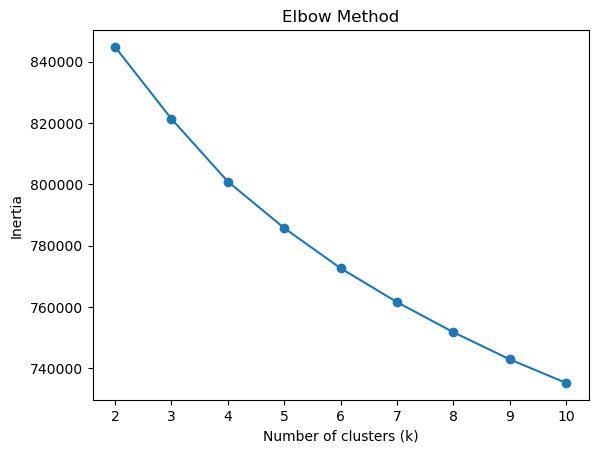

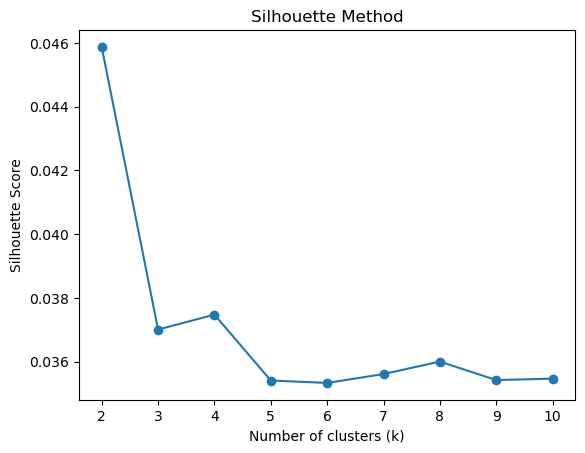

In [72]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 1. Apply PCA to reduce dimensions (keep ~95% variance)
pca = PCA(n_components=0.95, random_state=42)  # automatically chooses components
X_pca = pca.fit_transform(df_processed)

print("Original shape:", df_processed.shape)
print("Reduced shape after PCA:", X_pca.shape)

# 2. Elbow method + Silhouette score
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette
plt.plot(K, silhouette, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# # 3. Final KMeans (replace 5 with best k found above)
# best_k = 5
# kmeans = KMeans(n_clusters=best_k, random_state=42)
# df_final['cluster'] = kmeans.fit_predict(X_pca)


In [132]:
# 3. Final KMeans
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_processed['cluster'] = kmeans.fit_predict(X_pca)

In [134]:
cluster_profile = df_processed.groupby('cluster').mean()
print(cluster_profile)

              age  income_level  coverage_amount  premium_amount  \
cluster                                                            
0       -0.012368     -0.020680         0.013246        0.012129   
1        0.010428      0.004764        -0.007636       -0.007474   
2        0.006377      0.022956        -0.010256       -0.008924   

         purchase_year  purchase_month  purchase_day  purchase_weekday  \
cluster                                                                  
0             1.012829       -0.041729      0.032081         -0.029090   
1            -0.706748        0.020084      0.923434          0.027324   
2            -0.665042        0.036165     -0.938618          0.012286   

         gender_female  gender_male  ...  preferred_contact_time_afternoon  \
cluster                              ...                                     
0             0.488864     0.511136  ...                          0.173728   
1             0.481192     0.518808  ...              

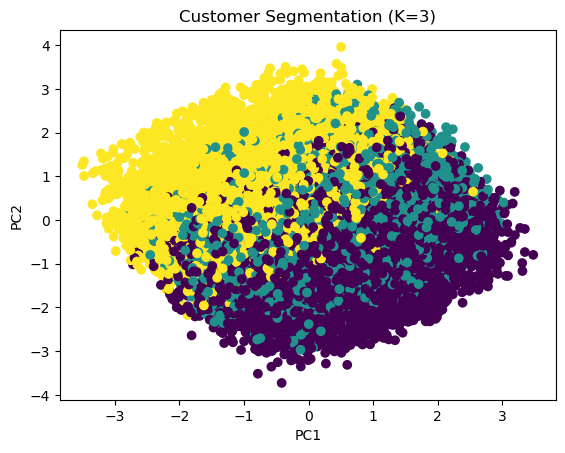

In [136]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=df_processed['cluster'], cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Segmentation (K=3)")
plt.show()


In [3]:
#cluster groups
import pandas as pd
df_clean = pd.read_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\customer_segmentation_data_cleaned.csv")
df_clean.head()

,age,gender,marital_status,education_level,geographic_information,occupation,income_level,behavioral_data,interactions_with_customer_service,insurance_products_owned,coverage_amount,premium_amount,policy_type,customer_preferences,preferred_contact_time,preferred_language,purchase_year,purchase_month,purchase_day,purchase_weekday
0,23,female,married,associate_degree,mizoram,entrepreneur,70541,policy5,phone,policy2,366603,2749,group,email,afternoon,english,2018,4,10,1
1,26,male,widowed,doctorate,goa,manager,54168,policy5,chat,policy1,780236,1966,group,mail,morning,french,2018,11,6,1
2,29,female,single,associate_degree,rajasthan,entrepreneur,73899,policy5,email,policy3,773926,4413,group,email,evening,german,2021,6,5,5
3,20,male,divorced,bachelors_degree,sikkim,entrepreneur,63381,policy5,chat,policy2,787815,4342,family,text,anytime,french,2018,9,2,6
4,25,female,separated,bachelors_degree,west_bengal,manager,38794,policy1,chat,policy4,366506,1276,family,email,weekends,english,2018,9,10,0


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   age                                 53503 non-null  int64 
 1   gender                              53503 non-null  object
 2   marital_status                      53503 non-null  object
 3   education_level                     53503 non-null  object
 4   geographic_information              53503 non-null  object
 5   occupation                          53503 non-null  object
 6   income_level                        53503 non-null  int64 
 7   behavioral_data                     53503 non-null  object
 8   interactions_with_customer_service  53503 non-null  object
 9   insurance_products_owned            53503 non-null  object
 10  coverage_amount                     53503 non-null  int64 
 11  premium_amount                      53503 non-null  in

In [3]:
df_processed = pd.read_csv(r"D:\Jeeva\ds_course\insurance_final_project\data\cleaned_data\customer_segmentation_data_scaled.csv")
df_processed.head()

,age,income_level,coverage_amount,premium_amount,purchase_year,purchase_month,purchase_day,purchase_weekday,gender_female,gender_male,...,preferred_contact_time_anytime,preferred_contact_time_evening,preferred_contact_time_morning,preferred_contact_time_weekends,preferred_language_english,preferred_language_french,preferred_language_german,preferred_language_mandarin,preferred_language_spanish,cluster
0,-1.401980,-0.333617,-0.469361,-0.213640,-1.470481,-0.715557,-0.570790,-1.000134,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,-1.203033,-0.780348,1.071729,-0.822588,-1.470481,1.297220,-1.067308,-1.000134,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,-1.004085,-0.241996,1.048219,1.080474,0.286929,-0.140478,-1.191437,0.986193,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,-1.600928,-0.528975,1.099966,1.025256,-1.470481,0.722141,-1.563826,1.482775,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,-1.269349,-1.199821,-0.469722,-1.359210,-1.470481,0.722141,-0.570790,-1.496716,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2
